# Versuch 1: Binäre Klassifikation von Fahrradwegen

## Einleitung

Ziel in diesem Versuch war die binäre Klassifizierung von kontinuierlich aufgenommenen Bildern von Radwegen. Dabei sollte unterschieden werden zwischen den Klassen befestigt und unbefestigt. Als Referenz wurde das Schlüsselattribut "surface" von OpenStreetMap genutzt mit welchem Wege oder Flächen getaggt werden. Grundsätzlich wird zwischen versiegelten Oberflächen und nicht versiegelten unterschieden. Zu den versiegelten Oberflächen gehören unter anderem Asphalt, Beton und Pflastersteine. Wege welche unbefestigt sind werden weiter unterschieden zwischen verdichtete Deckschichten, Split bzw. Grant, Schotter, Kies, Gras, Matsch, Sand, Schnee und weiteren Oberflächen. Die Bilder wurden manuell gelabelt für diesen Versuch.

## Hypothese

Mit einem Faltungsnetz, lässt sich eine binäre Klassifikation für das beschriebene Problem durchführen mit einer accuracy um die 90%. Wobei die Anzahl der Trainingsdaten auf 1600 begrenzt ist. Durch Hyperparameter-Tuning sollte ein noch besseres Ergebnis erzielt werden für die Leistungsmetrik accuracy.

## Versuchsaufbau

Die verwendeten Bilder kamen aus dem Datensatz 22. Für die beiden Klassen befestigt und unbefestigt gab es einen Ordner mit jeweils 1000 Bildern siehe Tab. 1 für eine Übersicht. Die Originalbilder hatten eine Auflösung von 1080px x 1920px und wurden auf 280px x 1448px zugeschnitten. Hierbei wurde im letzten Schritt die Bildgröße reduziert auf 70px x 362px siehe Abb. 1.1. Die Anzahl der Testdaten betrug 400 und die Anzahl der Trainingsdaten 1600.

Anzahl der Bilder | Verwendeter Datensatz | Bildgröße der Quellbilder | Verwendeter Ausschnitt der Quellbilder | Größe der Zielbilder(Skaliert)
--- | --- | --- | --- | --- |
2000 | 22 | 1080px x 1920px | 280px x 1448px | 70px x 362px |
Tabelle 1: Beschreibung der Trainingsdaten

<img src="../daten/abbildungen/CyclocrossBildausschnitt.png" width='500px' alt="cyclocross Bildausschnitt"/>
Abbildung 1.1: Cyclocross: Bildaufnahme zugeschnitten und skaliert

Als Verfahren für die Klassifizierung sollten Faltungsnetze trainiert werden mit verschiedenen Parametern siehe Tab. 2. Trainiert wurde auf einem PC mit einer GTX 1060. Als Vorlage für das Faltungsnetz diente ein Blog Artikel auf der Internetseite von [Keras]( https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html). Dieser wiederum gibt als Vorlage für die Faltungsnetz Architekturen Modelle von [Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf) an .
Durch Experimente sollte ermittelt werden, welche Parameter für das Trainingsmodell geeignet sind. Ziel war es ein Modell zu finden mit einer hohen accuracy und einen geringen loss bei der Validierung mit den Testdaten. Zu den Parametern gehörten unter anderem die Anzahl der Schichten, Anzahl der Filter(Feature-Maps), Methoden zur Regularisierung und Gradient descent Optimierungsalgorithmen.

Versuch Nr. | Faltungsschichten und Anzahl der Feature-Maps | Aktivierungsfunktion | Regularisierung | Optimierungsalgorithmus | Gewicht Initialisierung |   
--- | --- | --- | --- | --- | --- |
1.1 | Schicht 1(32 Feature-Maps),Schicht 2(32 Feature-Maps), Schicht 3(64 Feature-Maps) | ReLU | Dropout[0,1]/Pooling-Layer | RMSprop | Glorot Uniform | 
1.2 | Schicht 1(32 "),Schicht 2(32 "), Schicht 3(64) | ReLU | Dropout[0,1]/Pooling-Layer | RMSprop | Glorot Uniform | 
1.3 | Schicht 1(32 "),Schicht 2(32 "), Schicht 3(64) | {ReLU,ELU,SeLU,Sigmoid} | Dropout/Pooling-Layer | RMSprop | Glorot Uniform | 
1.4 | Schicht 1(32 "),Schicht 2(32 "), Schicht 3(64) | ELU | Dropout/Pooling-Layer | {RMSprop,Adagrad,Adadelta,Adam} | Glorot Uniform |  
1.5 | Schicht 1{[32,64]),Schicht 2[32,64] Schicht 3[64,128], Fully Connected Layer (Dimensionalität des Ausgaberaums: [64,128]) | ELU | Dropout/Pooling-Layer | Adam | Glorot Uniform | 
1.6 | Schicht 1(32),Schicht 2(32), Schicht 3(64) | ELU | Dropout/Pooling-Layer | Adam | Glorot Uniform |  
1.7 | {zu untersuchender Parameter mit 2-4 Faltungsschichten} | ELU | Dropout/Pooling-Layer | Adam | Glorot Uniform |
1.8 | {zu untersuchender Parameter mit 2-4 Faltungsschichten} | {ELU, ReLU} | Dropout[0,1]/Pooling-Layer | {Adam, RMSprop} | Glorot Uniform | 
1.9 | Schicht 1(32 "),Schicht 2(32 "), Schicht 3(64) | ELU | Dropout/Pooling-Layer | {Adam, RMSprop} | Glorot Uniform | 
Tabelle 2: Parameter der Faltungsnetze

Für das Finden von möglichst guten Hyperparameter für das Faltungnetz wurde Hyperas (siehe https://github.com/maxpumperla/hyperas) genutzt. Hyperas ist ein Wrapper um hyperopt (https://github.com/hyperopt/hyperopt), welcher ermöglicht optimierte Parameter für Keras-Modelle zu finden. Die Bibliothek Hyperopt wird dazu genutzt um eine gegebene Funktion mit Algorithmen zu minieren. Als Algorithmus wurde bei dem Versuchen Random Search genutzt. Mit 10 Durchgängen und jeweils 10 Epochen, um brauchbare Parameter mit einer hohen accuracy zu finden. Dabei wurde zudem Early Stopping genutzt. Eine Methode um das Training abzubrechen, wenn sich die accuracy als Beispiel Metrik nicht mehr erhöht. 

Die Modelle aus den Versuchen wurden abgespeichert in dem Ordner "ergebnisse_versuch1/modell_versuch1_[0-9]".

### Versuch 1.1:  Dropout Parameter

#### Versuchsbeschreibung

Ziel dieses Versuches (siehe Tab. 2 Versuch Nummer 1.1) war es geeignete Parameter für die Dropout Regulierung des Modells mit Hyperas zu finden. Bei Dropout wird mit einer angegebenen Wahrscheinlichkeit die Eingangswerte auf 0 gesetzt. In diesem Versuch wird nach jeder Faltungsschicht und nach dem Fully Connected Layer eine Dropout Regulierung ausgeführt. Die zufälligen Parameter für Dropout befanden sich bei diesem Versuch in dem Intervall von [0,1]. 

### Versuch 1.2: Dropout Parameter

#### Versuchsbeschreibung

Die Anzahl der Dropout Funktionen wurde auf eine reduziert, welche nach der Aktivierungsfunktion des Fully Connected Layers positioniert war. 

### Ergebnisse Versuch 1.1 und 1.2

Das beste Ergebnis hatte eine validierungs accuracy von $87.25\%$ (Tab. 3) aus Versuch 1.1. Hierbei ist zu beachten, dass zwar Early Stopping genutzt wurde aber immer das Modell der letzten Epoche abgespeichert wird. Wie in der Tabelle zu sehen hat die Anzahl der Dropout Funktionen keinen Einfluss auf die Gesamtzahl der Parameter. Der Suchraum über das Intervall mit [0,1] war relativ groß. Hier ist eine lange Suche mit allen möglichen Kombination der Parameter möglich. In Versuch Nummer 2 war die Trainings accuracy höher als die Validation accracy dies bedeutet, dass das Model überangepasst(Overfitting) ist. Die gefundenen Parameter aus Versuch Nummer 1 sind daher besser geeignet. 

### Versuch 1.3: Die Wahl der Aktivierungsfunktion

#### Versuchsbeschreibung 

Die Dropout Parameter aus dem Versuch 1.1 wurden übernommen. In diesem Versuch wurde eine Aktivierungsfunktion gesucht aus den Funktionen ReLU, ELU, SeLU und Sigmoid.

#### Ergebnis

In diesem Versuchsaufbau erfolgte die höchste validierungs accuracy mit der Aktivierungsfunktion ELU. Im Vergleich mit dem validierungs accuracy Ergebnis aus dem Versuch Nummer 1 fällt auf, dass beide Versuche den gleichen Wert von 87.25% ergaben. Dies zeigt das die Funktionen ELU und ReLU geeignet sind als Parameter für die Wahl eines passenden Modells. Mit einer höheren Trainings accuracy von 95% ist dieses Modell überangepasst. Eine weitere Regulierung des Faltungsnetzes ist empfehlenswert, um die Überanpassung zu reduzieren.

### Versuch 1.4: Wahl eines Optimierungsalgorithmus

#### Versuchsaufbau 

In diesem Versuch ging es darum eine Optimierungsfunktion zu finden wie in Tab. 2 zu sehen in Versuch Nummer 4.1 Spalte Optimierungsalgorithmus. Zur Auswahl standen RMSprop, Adagrad, Adadelta und Adam. 

#### Egebnis

Mit einer Trainings accuracy von $99.19\%$ war das Modell überangepasst. Als bester Optimierungsalgorithmus wurde Adam gefunden. Auch hier ist eine weitere Regulierung des Netzes sinnvoll.

### Versuch 1.5: Anzahl der Feature-Maps

#### Versuchsaufbau

Es sollten für die Faltungschichten und dem Fully Connected Layer eine passende Anzahl an feature maps und Dimension des Ausgaberaumes gesucht werden. Mit Hyperas wurden 20 Durchläufe auf der Suche nach guten Parametern durchgeführt.

#### Ergebnis

Das Ergebnis der Kombination an Feature-Maps in Tab. 3 Versuch Nummer 5 ergibt die beste validation accuracy. Dabei ist zu beachten, dass Versuch 1.4 eine höhere accuracy erzielt hat. Das Ergebnis ist auch abhängig davon wie die Trainingsdaten gemixt und die Gewichte Initialisiert worden. Die Anzahl der Parameter hat sich leicht erhöht im Vergleich zu den vorherigen Versuchen. Im Gegensatz zu Versuch 4.1 weist das gefundene Modell keine Überanpassung auf.

### Versuch 1.6: Padding Wahl

#### Versuchaufbau

In diesem Versuch wurden aus den vorherigen Versuchen die besten Parameter mit hoher validierungs accuracy ausgewählt. 
Untersucht wurde, welche padding Variante für das Auffüllen der Randwerte geeigneter ist. Zur Auswahls standen die Parameter valid und same. Mit Valid werden keine Felder mit Nullen ausgefüllt aber mit same wird erreicht das die Ausgabedimension gleich der Eingabedimension ist indem Felder mit Nullen aufgefüllt werden(siehe http://www.deeplearningbook.org/contents/convnets.html S. 345). 

#### Ergebnis

Wie in Tab. 3 zu sehen wurde "same" als Paramter für padding gefunden. Durch das Ausfüllen der Randfelder hat sich die Anzahl der Parameter des Netzes auf 1,503,394 erhöht.

### Versuch 1.7: Anzahl der Faltungsschichten

#### Versuchsaufbau

Ziel war es mit Hypertuning die Anzahl von Faltungsschichten zu optimieren. Dabei wurde unterschieden zwischen 2(32,64 Feature-Maps), 3(32,32,64 Feature-Maps) und 4(32,32,64,64) Faltungsschichten.

#### Ergebnis 

Die bisherige Wahl von 3 Faltungsschichten hat bei 10 Durchläufen die höchste validation accuracy ergeben.

### Versuch 1.8: Kombination von Parametern

#### Versuchsaufbau

In diesem Versuch wurden wie in Tab. 2 zu sehen die besten Parameter aus den vorherigen Versuchen ausgewählt. Es geht darum aus den gefundenen Parametern eine möglichst gute Kombination von Parametern zu finden. Auch in diesem Versuch gab es eine unterschiedliche Anzahl an Faltungsschichten. Durch die Kombination mit der Wahl der Dropout Parameter war es nicht möglich alle Parameter abzustimmen. Die Anzahl der Durchläufe in diesem Versuch war begrenzt auf 100. Erwartet wurde ein gefundenes Modell mit einer validierungs accuracy um die $90\%$. Vermutlich wird das resultierende Netz 2 oder 3 Faltungschichten haben und eine zunehmende Anzahl an Feature-Maps. Die Dropout Rate sollte zwischen 0.01 - 0.8 liegen. Eine höhere würde eine hohe Wahrscheinlichkeit ergeben das die Eingangswerte auf 0 gesetzt werden.

#### Ergebnis

Wie erwartet war die validation accuracy mit $93.50\%$ um die $90\%$ wie in der Hypothese behauptet. Die Berechnungsdauer des Versuchs hat $38m$ und $33s$ gedauert. Das Ergebnis ist nicht besser für die Metrik validation accuracy als das accuracy Ergebnis von Versuch 1.4.

### Versuch 9: Trainieren eines Faltungsnetz mit den gefundenen Parametern

#### Versuchsaufbau

Durch die vorherigen Ergebnisse sollte ein Faltungsnetz für die Aufgabe trainiert werden. Versuch Nummer 1.4 hat das beste Ergebnis nach der Metrik Test accuracy geliefert, weshalb die Parameter als Vorlage genutzt wurden. In 100 Epochen wurde ein Neuronales Netz trainiert. Dabei wurde das beste Modell nach der validation accuracy abgespeichert. 

#### Ergebnis: Modell mit höhster Genauigkeit

Für die Klassifizierungsaufgabe mit der niedrigen Anzahl von 1600 Trainingsdaten hatte das gefundene Modell einen Loss von $0.2861$ bei einer validation Accuracy von $95,25\%$. Das Modell war leicht überangepasst da die Trainings accuracy um $1.95\%$ höher lag. Die Kofusionsmatrix auf Abb. 1.2 zeigt, dass mit 14 falsch klassifizierten Bildern der Klasse befestigt diese häufiger falsch klassifiziert wurde als unbefestigte Fahrradwege. 

<img src="../daten/abbildungen/konfusionsmatrix_versuch1_9.png" width="300" alt="konfusionsmatrix_versuch1_9"/>
Abbildung 1.2: Konfusionsmatrix des Versuchs 1.9

## Ergebnisse
 
Versuch Nr. | Trainings accuracy | Trainings loss | Validierungs accuracy | Validierungs loss | Gefundene Parameter | Gesamtanzahl der Parameter des Faltungsnetz | 
--- | --- | --- | --- |
1.1 | 0.8569 | 0.3748 | 0.8725 | 0.3463 | {Dropout Funktion 1: 0.05422412690636627, Dropout Funktion 2: 0.33351393608141355, Dropout Funktion 3: 0.10530729142803252, Dropout Funktion 4: 0.4646841572241739} | 1 261 730 |
1.2 | 0.867  | 0.5285 | 0.84   | 0.4394 | {Dropout Funktion: 0.019408999555612594} | 1 261 730 |
1.3 | 0.95   | 0.1235 | 0.8725 | 0.2939 | ELU | 1 261 730
1.4 | 0.9919 | 0.0308 | 0.9425 | 0.1752 | Adam | 1 261 730
1.5 | 0.9175 | 0.2038 | 0.935  | 0.2181 |Faltungsschicht 1(32 Feature-Maps),Faltungsschicht 2(64 Feature-Maps), Faltungsschicht 3(64 Feature-Maps)  Fully Connected Layer (Dimensionalität des Ausgaberaums: 64) | 1 289 410
1.6 | 0.9188 | 0.2147 | 0.9225 | 0.2443 | same | 1 503 394
1.7 | 0.8919 | 0.2638 | 0.9150 | 0.2522 | 3 Faltungsschichten | 1 503 394
1.8 | 0.9431 | 0.1578 | 0.9350 | 0.2306 | Dropout Funktion 1: 0.21851337568749496, Dropout Funktion 2: 0.06592681764329411, Dropout Funktion 3: 0.5788302926379603, Dropout Funktion 4: 0.2467344568500468, Dropout Funktion 5: 0.2707091146632614, ELU, Adam, Faltungsschicht 1(32 Feature-Maps),Faltungsschicht 2(64 F.-Maps), Fully Connected Layer 3(64)}  | 1,531,074 
1.9 | 0.9719 | 0.0814 | 0.9525 | 0.2861 | | 1 261 730 |
Tabelle 3: Ergebnisse der Versuche

In der Tab. 3 sind die Ergebnisse der einzelnen Versuche protokolliert. Die Spalte "Gefundene Parameter" gibt die Parameter an, nach welchem mit Hyperas in einem Suchraum gesucht wurde sowie die gefundenen Werte. 

## Auswertung

Den gesamten Suchraum abzudecken, um ein geeignetes Modell nach einer Metrik für das gegebene Problem zu finden ist eine komplexe Aufgabe. Hyperas biete die Möglichkeit Parameter einzustellen. Hierbei ist es nötig experimentell und nach Vorlagen von existierenden Neuronalen Netzen den Suchraum einzuschränken, weil sonst die Suche sehr zeitintensiv ist.  Negativ an Hyperas ist, dass die Trainingshistorie nicht als Objekt zurückgegeben wird. Alternativ gibt es auch die Bibliothek GridSearchCV von scikit learn um Hyperparameter-Tuning durchzuführen.

Reihenfolge Nummer | Typ | Ausgabeform | Anzahl der Parameter
 --- | --- | --- | --- |
 1  | Faltungsschicht (3x3 Faltungskerngröße) | (360, 68, 32) | 896 
 2  | Aktivierungsfunktion: ELU | (360, 68, 32) | 0
 3  | Max-Pooling (2x2)| (180, 34, 32) | 0
 4  | Dropout (5% Rate) | (180, 34, 32) | 0
 5  | Faltungsschicht 2(3x3) | (178, 32, 32) | 9248
 6  | Aktivierungsfunktion: ELU | (178, 32, 32) | 0
 7  | Max-Pooling (2x2)| (89, 16, 32) | 0
 8  | Dropout (33% Rate)| (89, 16, 32) | 0
 9  | Faltungsschicht 3(3x3) | (87, 14, 64) | 18496
 10 | Aktivierungsfunktion: ELU | (87, 14, 64) | 0
 11 | Max-Pooling (2x2 | (43, 7, 64) | 0
 12 | Dropout (10% Rate) | (43, 7, 64) | 0
 13 | Flatten | 19264 | 0 
 14 | Fully Connected Layer | 64 | 1232960
 15 | Aktivierungsfunktion: ELU | 64 | 0
 16 | Dropout (46% Rate) | 64 | 0
 17 | Fully Connected Layer | 2 | 130
 18 | Aktivierungsfunktion: Softmax | 2 | 0
Tab. 4. Faltungsnetzwerk Architektur aus Versuch 1.9

Durch das Finden von geeigneten Parametern konnte das Modell in Versuch 1.9 (siehe Tab.4) trainiert werden. Dieses hat zwar eine relativ hohe validierungs accuracy von $95.25\%$ im Vergleich zu den anderen Versuchen ist der loss aber in Versuch 1.4 niedriger siehe Tab. 3. Dies liegt daran, dass das beste Modell nach der Metrik accuracy ausgesucht wurde. Das Ergebnis ist auch abhängig davon wie die Trainingsdaten gemischt und die Gewichte Initialisiert worden. In Versuch 1.9 wurde das beste Modell aus 100 Epochen ausgewählt.

In [1]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, rand
from hyperas import optim
from hyperas.distributions import uniform, choice

Using TensorFlow backend.


In [2]:
# Import von Bibliotheken
import os
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import load_model
import keras.callbacks as cb
import numpy as np
import pandas

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# Um Grafiken zu plotten
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn

In [5]:
images            = []          # Liste für alle Bilder
imagesNp          = np.array(0) # soll Bilder als numpy Array halten
startIndexUnpaved = 0           # Index Beginn der befestigte Wege
numberOfChannels  = 3           # Anzahl der Farbkanäle
numberOfClasses   = 2           # Anzahl der Klassen
classNames        = ['unbefestigt','befestigt'] # Namen der Klassen
yLabels           = np.array(0) # Labels / Klassen zuordnung
yShuffle          = np.array(0) # Labels mit der Methode shuffle() vermischt 
xShuffle          = np.array(0) # Bilder zum trainieren mit shuffle() vermischt
xTrain            = np.array(0) # Trainingsdaten (Bilder) 
xTest             = np.array(0) # Testdaten (Bilder)
yTrain            = np.array(0) # Klassen zuordnungen (Labels) für xTrain
yTest             = np.array(0) # Klassen zuordnung (Lables) für xTest

In [6]:
# Läd alle Bildaufnahmen der Klasse unbefestigt 
imagePathName = 'E:/bachelor/daten/22/2018_3_6_15_15/1/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

In [ ]:
# Einige Beispiele von unbefestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [7]:
# Läd alle Bildaufnahmen der Klasse befestigt
startIndexPaved = len(images)
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/befestigt/zugeschnitten/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

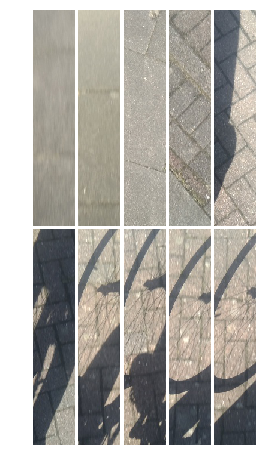

In [9]:
# Einige Beispiele von befestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[startIndexPaved: startIndexPaved + imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [10]:
# Y Klassen Labels zuweisen
# 0 unbefestigt
# 1 befestigt
yLabels = np.zeros(len(images)) 
yLabels[startIndexPaved:len(images)] = 1

In [11]:
# Erstellt einen "one hot encoding vector" für die gelabelten Bilder
yLabels = np_utils.to_categorical(yLabels, 0)

In [12]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(42)

In [ ]:
imagesNp = np.array(images[:200])
imagesNp = imagesNp.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
imagesNp /= 255
print (imagesNp.shape) # Form des Arrays (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

In [8]:
len(images[:200])

200

In [15]:
# Mischen der Trainingsdaten
xShuffle, yShuffle = shuffle(imagesNp,yLabels)
# Aufteilung in Trainings und Testdaten
xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.2)

In [16]:
len(xTrain) # Anzahl der Trainingsdaten

1600

In [17]:
len(yTest) # Anzahl der Testdaten

400

<b> Initialisierung des Faltungsnetz </b>
*****

In [125]:
# Parameter für das CNN
inputShape     = imagesNp[0].shape # Eingangs Array-Form 
numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
numNeuronsC2   = 32                # Anzahl der Filter / 2 Faltungsschicht
numNeuronsC3   = 64                # Anzahl der Filter / 3 Faltungsschicht
numNeuronsD1   = 64                # Anzahl der Neuronen des Fully connected layer - vollverbundene Schicht
poolSize       = 2                 # Größe der Pooling-Layer
convKernelSize = 3                 # Größe des Faltungskern n*n

In [126]:
model = Sequential()
model.add(Conv2D(numNeuronsC1, (convKernelSize, convKernelSize), padding='valid',input_shape=inputShape))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.05))

model.add(Conv2D(numNeuronsC2, (convKernelSize, convKernelSize)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.33))
  
model.add(Conv2D(numNeuronsC3, (convKernelSize, convKernelSize)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(numNeuronsD1))
model.add(Activation('elu'))
model.add(Dropout(0.46))

model.add(Dense(2))
model.add(Activation('softmax')) 

In [127]:
# Zusammenfassung der Parameter des neuralen Netzes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_356 (Conv2D)          (None, 360, 68, 32)       896       
_________________________________________________________________
activation_574 (Activation)  (None, 360, 68, 32)       0         
_________________________________________________________________
max_pooling2d_356 (MaxPoolin (None, 180, 34, 32)       0         
_________________________________________________________________
dropout_465 (Dropout)        (None, 180, 34, 32)       0         
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 178, 32, 32)       9248      
_________________________________________________________________
activation_575 (Activation)  (None, 178, 32, 32)       0         
_________________________________________________________________
max_pooling2d_357 (MaxPoolin (None, 89, 16, 32)        0         
__________

<b> Trainieren des Faltungsnetz</b>
*****

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [129]:
numEpoch=100
# Early Stopping unterbricht das Training, wenn nach n Epochen die Kostenfunktion nicht weiter minimiert werden konnte 
earlyStopping = cb.EarlyStopping(monitor='val_acc', patience=1000, verbose=0, mode='max')   
# Speichert das beste Modell mit der höhsten Test Accuracy ab
checkpointSafe = cb.ModelCheckpoint('ergebnisse_versuch1/modell_versuch1_9', monitor='val_acc', save_best_only=True)
hist = model.fit(xTrain, yTrain, batch_size=32, epochs=numEpoch,
              validation_data=(xTest, yTest), callbacks=[earlyStopping,checkpointSafe])

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 11s 7ms/step - loss: 0.8375 - acc: 0.6112 - val_loss: 0.9612 - val_acc: 0.5475
Epoch 2/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4863 - acc: 0.7863 - val_loss: 0.3736 - val_acc: 0.8425
Epoch 3/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4039 - acc: 0.8219 - val_loss: 0.3524 - val_acc: 0.8550
Epoch 4/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3878 - acc: 0.8344 - val_loss: 0.5879 - val_acc: 0.7900
Epoch 5/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4004 - acc: 0.8363 - val_loss: 0.3226 - val_acc: 0.8650
Epoch 6/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3876 - acc: 0.8375 - val_loss: 0.3285 - val_acc: 0.8600
Epoch 7/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3397 - acc: 0.8538 - val_loss: 0.3731 - val_acc: 0.8300
Epoch 8

Epoch 61/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3637 - val_acc: 0.9400
Epoch 62/100
1600/1600 [==============================] - 3s 2ms/step - loss: 6.1497e-04 - acc: 1.0000 - val_loss: 0.4063 - val_acc: 0.9350
Epoch 63/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.4364 - val_acc: 0.9275
Epoch 64/100
1600/1600 [==============================] - 3s 2ms/step - loss: 5.8192e-04 - acc: 1.0000 - val_loss: 0.3701 - val_acc: 0.9375
Epoch 65/100
1600/1600 [==============================] - 3s 2ms/step - loss: 4.8638e-04 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 0.9400
Epoch 66/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.0011 - acc: 0.9994 - val_loss: 0.3984 - val_acc: 0.9325
Epoch 67/100
1600/1600 [==============================] - 3s 2ms/step - loss: 3.8816e-04 - acc: 1.0000 - val_loss: 0.3836 - val_acc: 0.9425
Epoch 68/100
1600/1600 [========

In [1]:
plt.figure(4)
plt.title('Trainingshistorie: Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.figure(1)
plt.title('Trainingshistorie: Accuracy')
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [135]:
# Test Score
score = experiment9.evaluate(xTest, yTest, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.28617998033761977
Test accuracy: 0.9525


[[203   5]
 [ 14 178]]


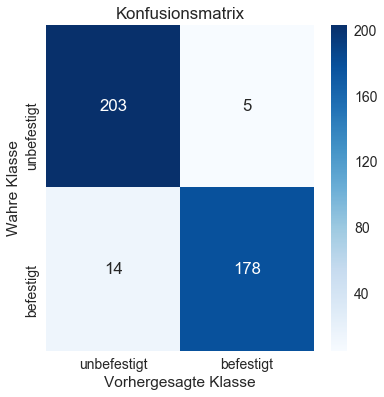

In [136]:
# Konfusionsmatrix
validPreds = experiment9.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show()

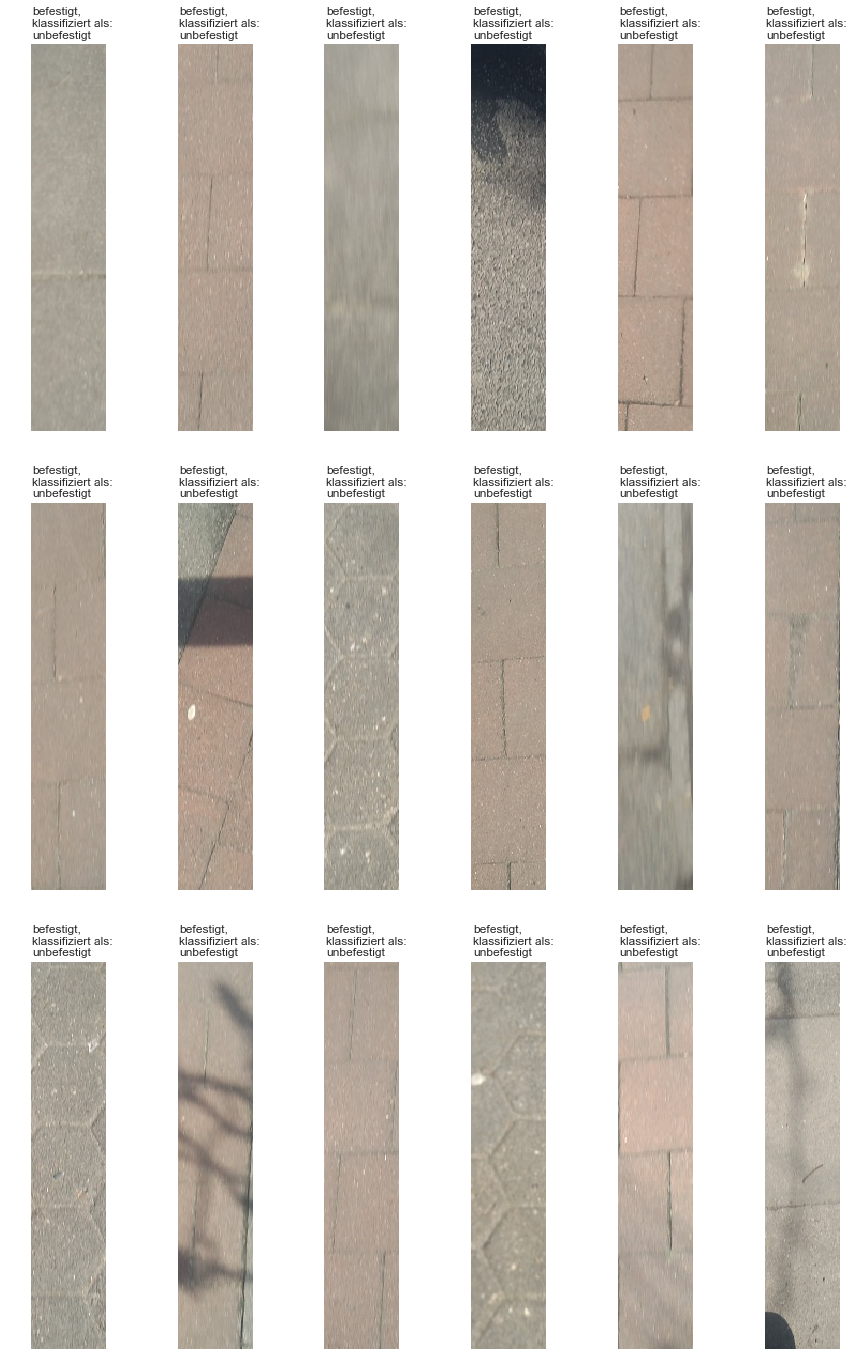

In [59]:
# Plot falsch vorhergesagter Bilder
predictedClasses = model.predict_classes(xTest)   
yTestNumber = np.argmax(yTest, axis=1)
incorrect = []
for i, y in enumerate(yTestNumber):
    if y != predictedClasses[i]:
        incorrect.append(i)
seaborn.set(font_scale=1)
fig = plt.figure(1, figsize=(24,24))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=1.0)
for i, incorr in enumerate(incorrect[0:18]):
    ax = grid[i]
    ax.imshow(xTest[incorr], cmap='gray')
    ax.text(1,-20, classNames[yTestNumber[incorr]] + ",\nklassifiziert als: \n" + classNames[predictedClasses[incorr]], verticalalignment='center')
    ax.axis('off')
plt.show()     

<b> Hyperparameter Tuning mit Hyperas  </b>
*****

In [26]:
# Eine Funktion die das zu optimierende Keras-Modell beschreibt
# Die vorgehensweise mit einer Funktion ist nach der Dokumentation von Hyperas vorgegeben 
# siehe https://github.com/maxpumperla/hyperas
def model(xTrain, xTest, yTrain, yTest):
    # Parameter für das CNN
    inputShape     = xTrain[0].shape   # Eingangs Array-Form 
    numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
    numNeuronsC2   = 32                # Anzahl der Filter / 2 Faltungsschicht
    numNeuronsC3   = 64                # Anzahl der Filter / 3 Faltungsschicht
    numNeuronsD1   = 64                # Anzahl der Neuronen des Fully connected layer - vollverbundene Schicht
    poolSize       = 2                 # Größe der Pooling-Layer
    convKernelSize = 3                 # Größe des Faltungskern n*n
    
    model = Sequential()
    layerCountTuning = {{choice(['2Layer', '3Layer','4Layer'])}}
    print(layerCountTuning)
    af = {{choice(['relu', 'elu'])}}
    print(af)
    optf = {{choice(['RMSprop','Adam'])}}
    print(optf)
    model.add(Conv2D(32, (convKernelSize, convKernelSize), padding='same', input_shape=inputShape))
    model.add(Activation(af))
    model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
    model.add(Dropout({{uniform(0, 1)}}))
        
    if layerCountTuning == '3Layer' or '4Layer':
        filterCount1 = {{choice([32, 64])}}
        model.add(Conv2D(filterCount1, (convKernelSize, convKernelSize), padding='same'))
        model.add(Activation(af))
        model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
        model.add(Dropout({{uniform(0, 1)}}))

    if layerCountTuning == '4Layer':
        filterCount2 = {{choice([64, 128])}}
        model.add(Conv2D(filterCount2, (convKernelSize, convKernelSize), padding='same'))
        model.add(Activation(af))
        model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
        model.add(Dropout({{uniform(0, 1)}}))
    
    filterCount3 = {{choice([64, 128])}}
    model.add(Conv2D(filterCount3, (convKernelSize, convKernelSize), padding='same'))
    model.add(Activation(af))
    model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
    model.add(Dropout({{uniform(0, 1)}}))

    model.add(Flatten())
    dims4 = {{choice([64, 128])}}
    model.add(Dense(dims4))
    model.add(Activation(af))
    model.add(Dropout({{uniform(0, 1)}}))

    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer=optf, metrics=["accuracy"])
    print('Train...')
    # Early Stopping unterbricht das Training, wenn nach 3 Epochen die Kostenfunktion nicht weiter minimiert werden konnte 
    earlyStopping = cb.EarlyStopping(monitor='val_acc', patience=3, verbose=0, mode='max')
    
    model.fit(xTrain, yTrain, batch_size=32, epochs=10,
              validation_data=(xTest, yTest), callbacks=[earlyStopping])
    score, acc = model.evaluate(xTest, yTest, batch_size=32)
    print('Test score:', score)
    print('Test accuracy:', acc)
    # Die Rückgabewerte werden verarbeitet von Hyperas
    # loss ist die Kostenfunktion welche minimiert werden soll mit Hyperas
    # status (STATUS_OK) gibt an das, dass Modell erfolgreich ausgeführt wurde
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [27]:
def data():
    images = []
    # Läd alle Bildaufnahmen der Klasse unbefestigt 
    imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/unbefestigt/zugeschnitten/'
    files = os.listdir(imagePathName)
    for file in files:
        if "jpg" not in file:
            continue
        images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))
    # Läd alle Bildaufnahmen der Klasse befestigt
    startIndexUnpaved = len(images)
    imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/befestigt/zugeschnitten/'
    files = os.listdir(imagePathName)
    for file in files:
        if "jpg" not in file:
            continue
        images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))
    # Y Klassen Labels zuweisen
    yLabels = np.zeros(len(images)) 
    yLabels[startIndexUnpaved-1:len(images)] = 1
    # Erstellt einen "one hot encoding vector" für die gelabelten Bilder
    yLabels = np_utils.to_categorical(yLabels, 0)
    # Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
    np.random.seed(42)
    imagesNp = np.array(images)
    imagesNp = imagesNp.astype('float32')
    # Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
    imagesNp /= 255
    
    xShuffle, yShuffle = shuffle(imagesNp,yLabels)
    # Aufteilung in Trainings und Testdaten
    xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.2)
    print('data functioN')
    return xTrain, xTest, yTrain, yTest

In [28]:
# Die Hyperas Methode optim sucht im Suchraum die Parameter 
# Bei einer Änderung des Methodenrumpf der Methode model() muss der Notebook Kernel neu gestartet werden
bestRun, bestModel = optim.minimize(model=model,               
                                          data=data,
                                          algo=rand.suggest,   # Algorithmus: Random Search
                                          max_evals=100,          
                                          trials=Trials(),      # eine Liste von Verzeichnissen, die alles über die Suche enthalten.
                                          notebook_name='CNN_experiment1')  # Der Name des Notebooks sollte als String angegeben werden
print(bestRun)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, rand
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import uniform, choice
except:
    pass

try:
    import os
except:
    pass

try:
    import cv2
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation, Flatten
except:
    pass

try:
    from keras.layers.convolutional import Conv2D, MaxPooling2D
except:
    pass

try:
    from keras.optimizers import RMSprop
except:
    pass

try:
    from keras.models import load_model
except:
    pass

try:
    import keras.callbacks as cb
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas
except:
    pass

try:
    from sklearn.utils import shuffle
except:
    pass

try:
    from sklearn.

400/400 [==============================] - 0s 659us/step
Test score: 7.694514808654785
Test accuracy: 0.52
2Layer
elu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.8079 - acc: 0.6200 - val_loss: 0.6665 - val_acc: 0.5925
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5551 - acc: 0.7206 - val_loss: 0.4235 - val_acc: 0.8075
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4656 - acc: 0.7906 - val_loss: 0.4541 - val_acc: 0.7975
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3618 - acc: 0.8506 - val_loss: 0.5158 - val_acc: 0.8125
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3361 - acc: 0.8625 - val_loss: 0.3606 - val_acc: 0.8550
Epoch 6/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3290 - acc: 0.8662 - val_loss: 0.2876 - val_acc: 0.8750
Epoch 7/10
1600/1

Epoch 4/10
400/400 [==============================] - 0s 731us/step
Test score: 4.9387322044372555
Test accuracy: 0.48
2Layer
elu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.9756 - acc: 0.5356 - val_loss: 0.5441 - val_acc: 0.7275
Epoch 2/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.5334 - acc: 0.7450 - val_loss: 0.4393 - val_acc: 0.8000
Epoch 3/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4566 - acc: 0.8069 - val_loss: 0.4554 - val_acc: 0.8000
Epoch 4/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4459 - acc: 0.8150 - val_loss: 0.3302 - val_acc: 0.8775
Epoch 5/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.3781 - acc: 0.8444 - val_loss: 0.3403 - val_acc: 0.8725
Epoch 6/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.3845 - acc: 0.8419 - val_loss: 0.3237 - val_acc: 0.8600
Epoch

400/400 [==============================] - 0s 744us/step
Test score: 6.706585083007813
Test accuracy: 0.48
2Layer
relu
RMSprop
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 7s 4ms/step - loss: 7.8490 - acc: 0.4994 - val_loss: 5.2444 - val_acc: 0.4800
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 7.9249 - acc: 0.5056 - val_loss: 5.2444 - val_acc: 0.4800
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 7.9249 - acc: 0.5056 - val_loss: 5.2444 - val_acc: 0.4800
Epoch 4/10
400/400 [==============================] - 0s 726us/step
Test score: 5.244379329681396
Test accuracy: 0.48
3Layer
elu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 7s 4ms/step - loss: 1.8044 - acc: 0.5088 - val_loss: 0.6829 - val_acc: 0.5400
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6442 - acc: 0

1600/1600 [==============================] - 8s 5ms/step - loss: 7.8610 - acc: 0.5044 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 2/10
1600/1600 [==============================] - 4s 2ms/step - loss: 7.9249 - acc: 0.5056 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 3/10
1600/1600 [==============================] - 4s 2ms/step - loss: 7.9249 - acc: 0.5056 - val_loss: 8.3357 - val_acc: 0.4800
Epoch 4/10
400/400 [==============================] - 0s 768us/step
Test score: 8.335724487304688
Test accuracy: 0.48
3Layer
relu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 8s 5ms/step - loss: 1.1863 - acc: 0.4988 - val_loss: 0.6930 - val_acc: 0.5200
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6925 - acc: 0.5550 - val_loss: 0.6923 - val_acc: 0.5200
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6898 - acc: 0.5500 - val_loss: 0.6916 - val_acc: 0.5200
Epoch 4/10
400/4

1600/1600 [==============================] - 9s 5ms/step - loss: 0.8161 - acc: 0.4888 - val_loss: 0.6926 - val_acc: 0.4800
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6781 - acc: 0.5275 - val_loss: 0.6923 - val_acc: 0.5200
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6492 - acc: 0.6175 - val_loss: 0.6943 - val_acc: 0.5200
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5731 - acc: 0.7144 - val_loss: 0.8962 - val_acc: 0.5200
Epoch 5/10
400/400 [==============================] - 0s 764us/step
Test score: 1.180022532939911
Test accuracy: 0.52
4Layer
relu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 9s 6ms/step - loss: 7.8084 - acc: 0.5062 - val_loss: 5.0129 - val_acc: 0.4800
Epoch 2/10
1600/1600 [==============================] - 4s 2ms/step - loss: 7.9249 - acc: 0.5056 - val_loss: 5.0809 - val_acc: 0.4800
Epoch 3/10
1600/

400/400 [==============================] - 0s 664us/step
Test score: 0.5525954341888428
Test accuracy: 0.715
2Layer
relu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 10s 6ms/step - loss: 2.7724 - acc: 0.5231 - val_loss: 0.6931 - val_acc: 0.5200
Epoch 2/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.6909 - acc: 0.4888 - val_loss: 0.6932 - val_acc: 0.4800
Epoch 3/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.6821 - acc: 0.5413 - val_loss: 0.6925 - val_acc: 0.5200
Epoch 4/10
400/400 [==============================] - 0s 977us/step
Test score: 0.6925075912475586
Test accuracy: 0.52
3Layer
relu
RMSprop
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 9s 6ms/step - loss: 0.7866 - acc: 0.5181 - val_loss: 0.6857 - val_acc: 0.5400
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.6825 - a

Epoch 4/10
400/400 [==============================] - 0s 859us/step
Test score: 0.6935077166557312
Test accuracy: 0.48
2Layer
relu
Adam
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 10s 6ms/step - loss: 7.7990 - acc: 0.4875 - val_loss: 4.9547 - val_acc: 0.5200
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 8.1053 - acc: 0.4944 - val_loss: 5.0010 - val_acc: 0.5200
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 8.1053 - acc: 0.4944 - val_loss: 5.0014 - val_acc: 0.5200
Epoch 4/10
400/400 [==============================] - 0s 781us/step
Test score: 5.001365232467651
Test accuracy: 0.52
4Layer
relu
RMSprop
Train...
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 11s 7ms/step - loss: 0.7141 - acc: 0.5244 - val_loss: 0.6922 - val_acc: 0.5200
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 

In [29]:
bestRun

{'Dropout': 0.21851337568749496,
 'Dropout_1': 0.06592681764329411,
 'Dropout_2': 0.5788302926379603,
 'Dropout_3': 0.2467344568500468,
 'Dropout_4': 0.2707091146632614,
 'af': 1,
 'filterCount1': 1,
 'filterCount2': 1,
 'filterCount2_1': 0,
 'filterCount2_2': 0,
 'layerCountTuning': 0,
 'optf': 1}

In [30]:
# Test Score
score = bestModel.evaluate(xTest, yTest, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.23059062868356706
Test accuracy: 0.935


In [31]:
# Hyperas Ergebnisse des gefundenen Modells
bestModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 362, 70, 32)       896       
_________________________________________________________________
activation_65 (Activation)   (None, 362, 70, 32)       0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 181, 35, 32)       0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 181, 35, 32)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 181, 35, 64)       18496     
_________________________________________________________________
activation_66 (Activation)   (None, 181, 35, 64)       0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 90, 17, 64)        0         
__________

[[206   2]
 [ 24 168]]


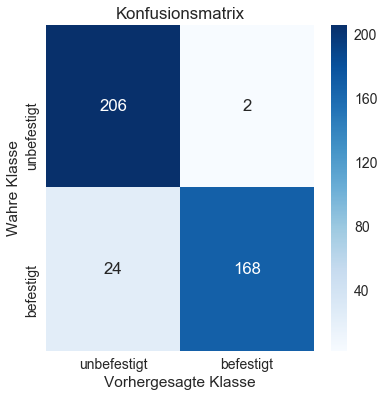

In [32]:
# Konfusionsmatrix
validPreds = bestModel.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show()

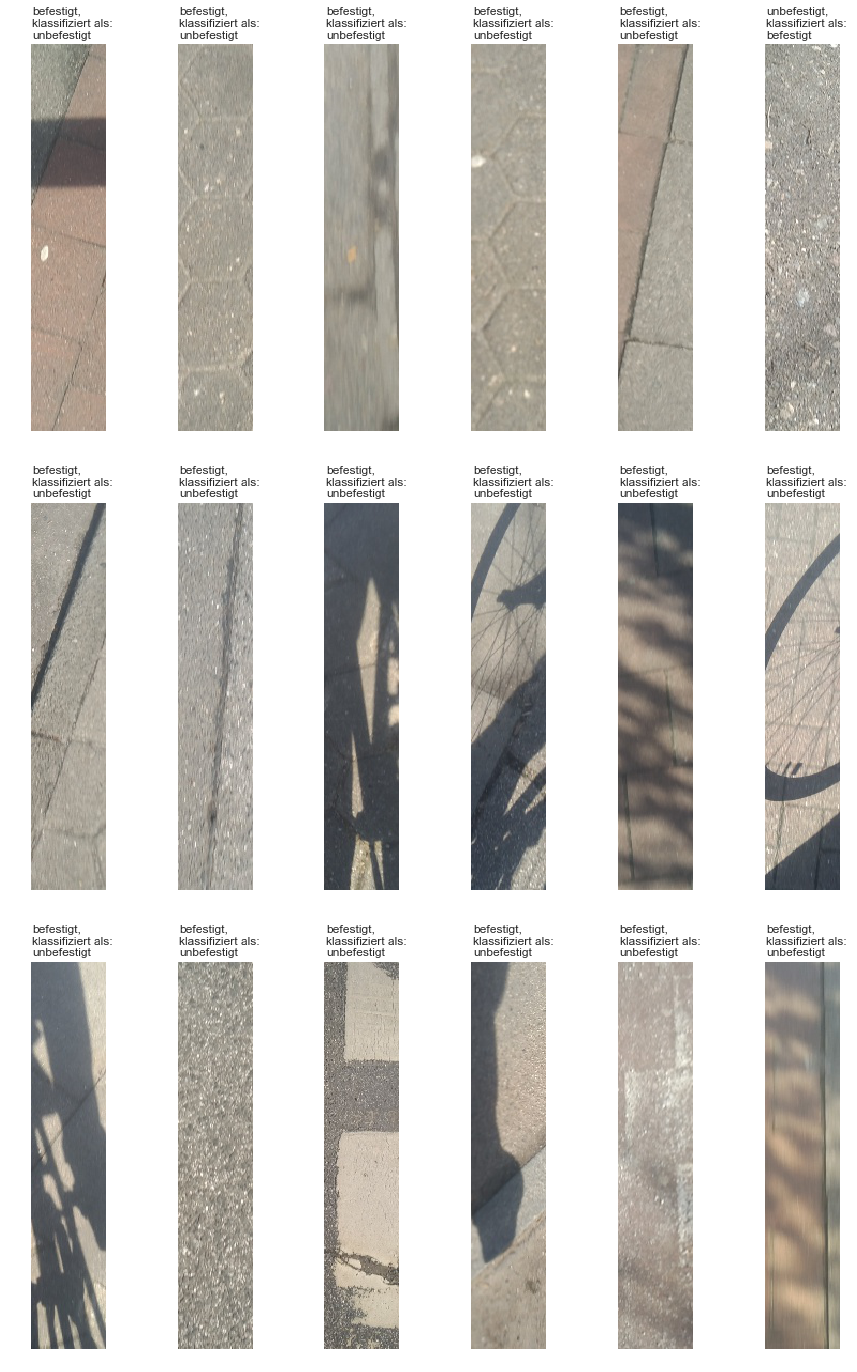

In [33]:
# Plot falsch vorhergesagte Bilder
predictedClasses = bestModel.predict_classes(xTest)   
yTestNumber = np.argmax(yTest, axis=1)
incorrect = []
for i, y in enumerate(yTestNumber):
    if y != predictedClasses[i]:
        incorrect.append(i)
seaborn.set(font_scale=1)
fig = plt.figure(1, figsize=(24,24))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=1.0)
for i, incorr in enumerate(incorrect[0:18]):
    ax = grid[i]
    ax.imshow(xTest[incorr], cmap='gray')
    ax.text(1,-20, classNames[yTestNumber[incorr]] + ",\nklassifiziert als: \n" + classNames[predictedClasses[incorr]], verticalalignment='center')
    ax.axis('off')
plt.show() 

In [5]:
# Läd Modell
experiment9 = load_model('ergebnisse_versuch1/modell_versuch1_9')

In [18]:
score = experiment9.evaluate(xTest, yTest, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.28618000239133834
Test accuracy: 0.9525


[[203   5]
 [ 14 178]]


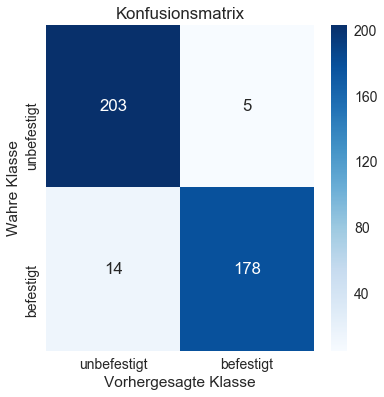

In [20]:
# Konfusionsmatrix
validPreds = experiment9.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig('ergebnisse_versuch1/konfusionsmatrix_versuch1_9')
plt.show()